<a href="https://colab.research.google.com/github/durgavenkatareddy/Project/blob/main/project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler


In [6]:
# Load your HR Attrition data
df = pd.read_csv('HR_Attrition_Data.csv')

In [7]:
# Convert Attrition to binary (Yes = 1, No = 0)
df['Attrition'] = df['Attrition'].map({'Yes': 1, 'No': 0})


In [8]:
# Columns to encode
categorical_cols = ['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'OverTime']

# Apply Label Encoding
le = LabelEncoder()
for col in categorical_cols:
    df[col] = le.fit_transform(df[col])


In [9]:
df = df.drop(['EmployeeNumber', 'Over18', 'EmployeeCount', 'StandardHours'], axis=1)


In [10]:
# Identify numerical columns (excluding target 'Attrition')
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns.drop('Attrition')

# Apply StandardScaler
scaler = StandardScaler()
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])


In [11]:
print(df.head())


        Age  Attrition  BusinessTravel  DailyRate  Department  \
0  0.446350          1        0.590048   0.742527    1.401512   
1  1.322365          0       -0.913194  -1.297775   -0.493817   
2  0.008343          1        0.590048   1.414363   -0.493817   
3 -0.429664          0       -0.913194   1.461466   -0.493817   
4 -1.086676          0        0.590048  -0.524295   -0.493817   

   DistanceFromHome  Education  EducationField  EnvironmentSatisfaction  \
0         -1.010909  -0.891688       -0.937414                -0.660531   
1         -0.147150  -1.868426       -0.937414                 0.254625   
2         -0.887515  -0.891688        1.316673                 1.169781   
3         -0.764121   1.061787       -0.937414                 1.169781   
4         -0.887515  -1.868426        0.565311                -1.575686   

     Gender  ...  PerformanceRating  RelationshipSatisfaction  \
0 -1.224745  ...          -0.426230                 -1.584178   
1  0.816497  ...           2

In [12]:
X = df.drop('Attrition', axis=1)
y = df['Attrition']


In [13]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [14]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Train Logistic Regression
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train, y_train)

# Predict
y_pred_lr = lr_model.predict(X_test)

# Evaluate
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_lr))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_lr))
print("Classification Report:\n", classification_report(y_test, y_pred_lr))


Logistic Regression Accuracy: 0.8945578231292517
Confusion Matrix:
 [[249   6]
 [ 25  14]]
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.98      0.94       255
           1       0.70      0.36      0.47        39

    accuracy                           0.89       294
   macro avg       0.80      0.67      0.71       294
weighted avg       0.88      0.89      0.88       294



In [15]:
from sklearn.tree import DecisionTreeClassifier

# Train Decision Tree
dt_model = DecisionTreeClassifier(max_depth=5, random_state=42)
dt_model.fit(X_train, y_train)

# Predict
y_pred_dt = dt_model.predict(X_test)

# Evaluate
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_dt))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_dt))
print("Classification Report:\n", classification_report(y_test, y_pred_dt))


Decision Tree Accuracy: 0.826530612244898
Confusion Matrix:
 [[237  18]
 [ 33   6]]
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.93      0.90       255
           1       0.25      0.15      0.19        39

    accuracy                           0.83       294
   macro avg       0.56      0.54      0.55       294
weighted avg       0.79      0.83      0.81       294



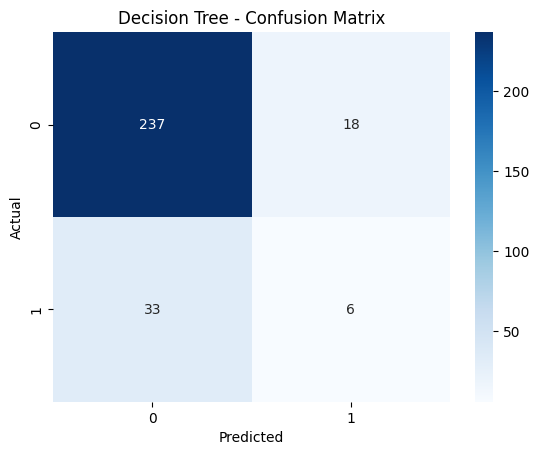

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred_dt)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Decision Tree - Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


In [17]:
import shap

# Initialize SHAP Explainer for Decision Tree
explainer = shap.TreeExplainer(dt_model)

# Compute SHAP values
shap_values = explainer.shap_values(X_test)


In [18]:
print(shap_values[1].shape)
print(X_test.shape)
print(len(shap_values))  # Check number of classes



(30, 2)
(294, 30)
294


<ipython-input-19-d8e0c00d5bbb>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=dept_attrition, x='Department', y='Attrition', palette='viridis')


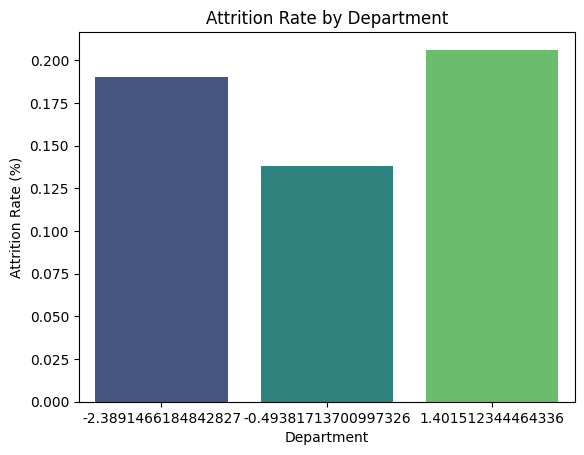

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

# Department-wise Attrition count
dept_attrition = df.groupby('Department')['Attrition'].mean().reset_index()

# Visualization
sns.barplot(data=dept_attrition, x='Department', y='Attrition', palette='viridis')
plt.title('Attrition Rate by Department')
plt.ylabel('Attrition Rate (%)')
plt.show()


<ipython-input-20-a4be8ec8be87>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=overtime_attrition, x='OverTime', y='Attrition', palette='Set2')


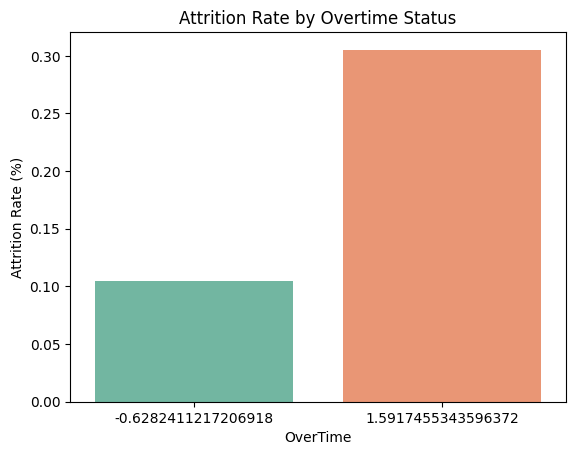

In [20]:
# Overtime impact on Attrition
overtime_attrition = df.groupby('OverTime')['Attrition'].mean().reset_index()

sns.barplot(data=overtime_attrition, x='OverTime', y='Attrition', palette='Set2')
plt.title('Attrition Rate by Overtime Status')
plt.ylabel('Attrition Rate (%)')
plt.show()

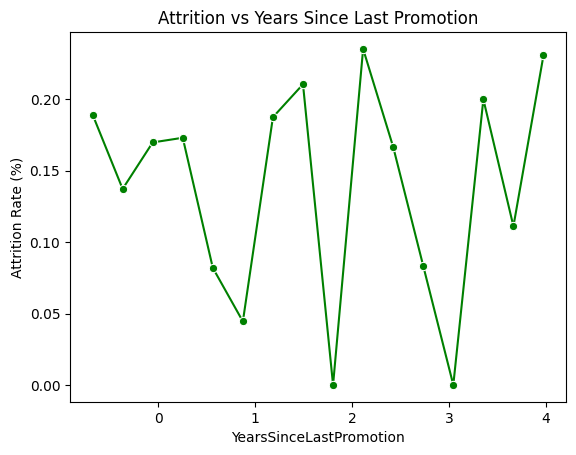

In [21]:
# Attrition Rate by Years Since Last Promotion
promotion_attrition = df.groupby('YearsSinceLastPromotion')['Attrition'].mean().reset_index()

sns.lineplot(data=promotion_attrition, x='YearsSinceLastPromotion', y='Attrition', marker='o', color='green')
plt.title('Attrition vs Years Since Last Promotion')
plt.ylabel('Attrition Rate (%)')
plt.show()
